In [1]:
import numpy as np
import scipy.stats as stats
import statistics
import matplotlib.pyplot as plt

In [11]:
variance, noiseMean, signalMean = 1, 0, 1
criterionList = np.linspace(-3, 3, 100)
nTrials = 100
C = len(criterionList)

In [12]:
pCR  = np.zeros(C)
pHit = np.zeros(C)
dPrimeEst = np.zeros(C)

In [13]:
for criterionNum in range(C):
    criterion = criterionList[criterionNum]
    stim_temp = np.floor(np.linspace(0.5, 1.5, nTrials))
    stim = stim_temp[np.random.permutation(range(nTrials))]
    
    resp = np.zeros(nTrials)
    internalResponse = np.zeros(nTrials)
    for t in range(nTrials):
        if stim[t] == 0:
            internalResponse[t] = ...
        else:
            internalResponse[t] = ...
        resp[t] = internalResponse[t] > criterion
        
    ## Correct Rejection
    pCR[criterionNum] = ...
    if pCR[criterionNum]==0.0 or pCR[criterionNum]==1.0:
        zCR = np.nan
    else: 
        zCR = statistics.NormalDist().inv_cdf(pCR[criterionNum])
        
    ## Hits
    pHit[criterionNum] = ...
    if pHit[criterionNum]==0.0 or pHit[criterionNum]==1.0:
        zHit = np.nan
    else:
        zHit = statistics.NormalDist().inv_cdf(pHit[criterionNum])
        
    dPrimeEst[criterionNum] =zCR + zHit
        

        

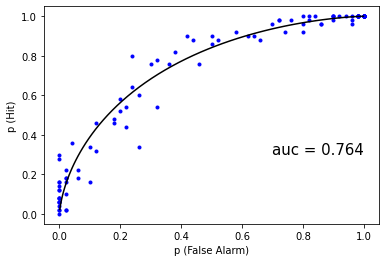

In [14]:
# Display results step-by-step
dPrime = (signalMean - noiseMean)/np.sqrt(variance)
pFA = 1-pCR

pHitReal = np.array([1- statistics.NormalDist(signalMean, np.sqrt(variance)).cdf(c) for c in criterionList])
pFAReal = np.array([1- statistics.NormalDist(noiseMean, np.sqrt(variance)).cdf(c) for c in criterionList])

area_under_curve = np.trapz(sorted(pHit),sorted(pFA))
plt.plot(pFA, pHit, 'b.')
plt.plot(pFAReal, pHitReal, 'k')
plt.xlabel('p (False Alarm)')
plt.ylabel('p (Hit)')
plt.text(0.7, 0.3, 'auc = {:04.3f}'.format(area_under_curve), size=15)
plt.show()


0.704
[ 3.58276072  2.58276072  2.3538378   2.33375814  1.84394811  1.76628575
  1.73326352  1.66379063  1.50237834  1.48522563  1.44507445  1.37669333
  1.05382158  1.03588056  0.88729177  0.84730108  0.55086518  0.43969793
  0.38689064  0.24359469  0.22539537  0.1430734   0.10265556  0.04989989
  0.04428605 -0.07747885 -0.14073685 -0.23871613 -0.24289529 -0.24550201
 -0.25279112 -0.27089668 -0.27175828 -0.58487457 -0.64445818 -0.81159099
 -0.83984686 -1.75769152 -1.79289563 -2.0913586 ]
[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515

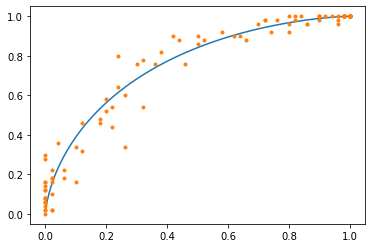

In [15]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(stim, internalResponse, pos_label=1)
plt.plot(sorted(pFAReal),sorted(pHitReal))
plt.plot(pFA, pHit,'.')
area_under_curve2 = metrics.auc(sorted(fpr), sorted(tpr))
print(area_under_curve2)
print(thresholds)
print(criterionList)